# Loading in Residual Count Dataset

- each value shows gene expression via RNA sequencing

In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv('data/RNAseqHarm/MSBB_Residualized_counts_(diagnosis-sex-age-death).tsv', delimiter="\t")
df1 = pd.read_csv('data/RNAseqHarm/RNAseq_Harmonization_MSBB_combined_metadata.csv')

In [49]:
df2 = df.copy()
df2 = df2.rename(columns={'feature':'index'})
df2 = df2.set_index('index').T
df2.reset_index(inplace=True)
df2.rename(columns={'index':'ID'}, inplace=True)

In [50]:
df2.shape

(1247, 22737)

In [51]:
df2['ID']

0                  BM_22_213
1                  BM_22_222
2                  BM_22_229
3                  BM_22_230
4                  BM_22_231
                ...         
1242     hB_RNA_9180_L43C014
1243     hB_RNA_9187_L43C014
1244    hB_RNA_9189_E007C014
1245     hB_RNA_9191_L43C014
1246     hB_RNA_9208_L43C014
Name: ID, Length: 1247, dtype: object

In [52]:
df1['specimenID'].value_counts().head()

hB_RNA_8285     1
hB_RNA_13351    1
BM_36_347       1
BM_10_739       1
BM_10_729       1
Name: specimenID, dtype: int64

In [53]:
df1.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'organ', 'tissue',
       'BrodmannArea', 'assay', 'isPostMortem', 'exclude', 'excludeReason',
       'individualIdSource', 'species', 'sex', 'race', 'ethnicity', 'ageDeath',
       'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR', 'plaqueMean'],
      dtype='object')

In [54]:
df1.head()

,specimenID,platform,RIN,sequencingBatch,libraryPrep,libraryPreparationMethod,runType,readLength,barcode,totalReads,...,sex,race,ethnicity,ageDeath,apoeGenotype,pmi,CERAD,Braak,CDR,plaqueMean
0,hB_RNA_8285,HiSeq2500,3.9,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8285,3791354,...,female,W,W,90+,NaN,317.0,2.0,6.0,3.0,NaN
1,hB_RNA_8295,HiSeq2500,8.1,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8295,4079721,...,female,W,W,90+,NaN,115.0,2.0,6.0,3.0,NaN
2,hB_RNA_8255,HiSeq2500,3.7,E3C014,rRNAdepletion,TruSeq,singleEnd,100,8255,4312147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hB_RNA_8215_resequenced,HiSeq2500,7.7,B18C014,rRNAdepletion,TruSeq,singleEnd,100,8215,4458895,...,female,W,W,90+,NaN,160.0,3.0,5.0,5.0,NaN
4,hB_RNA_10242,HiSeq2500,10.0,E3C014,rRNAdepletion,TruSeq,singleEnd,100,10242,4838300,...,female,W,W,90+,NaN,710.0,2.0,5.0,3.0,NaN


In [55]:
dfy = df1

In [56]:
dfy['tissue'].value_counts()

superior temporal gyrus    334
parahippocampal gyrus      315
frontal pole               310
inferior frontal gyrus     308
prefrontal cortex           15
Name: tissue, dtype: int64

In [57]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1282 non-null   object 
 1   platform                  1282 non-null   object 
 2   RIN                       1282 non-null   float64
 3   sequencingBatch           1282 non-null   object 
 4   libraryPrep               1282 non-null   object 
 5   libraryPreparationMethod  1282 non-null   object 
 6   runType                   1282 non-null   object 
 7   readLength                1282 non-null   int64  
 8   barcode                   1282 non-null   int64  
 9   totalReads                1282 non-null   int64  
 10  mapped                    1282 non-null   int64  
 11  rRNA.rate                 1282 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1282 non-null   object 
 14  tissue  

In [58]:
dfy = dfy[dfy['excludeReason'].isnull()]

In [59]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1281
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   specimenID                1259 non-null   object 
 1   platform                  1259 non-null   object 
 2   RIN                       1259 non-null   float64
 3   sequencingBatch           1259 non-null   object 
 4   libraryPrep               1259 non-null   object 
 5   libraryPreparationMethod  1259 non-null   object 
 6   runType                   1259 non-null   object 
 7   readLength                1259 non-null   int64  
 8   barcode                   1259 non-null   int64  
 9   totalReads                1259 non-null   int64  
 10  mapped                    1259 non-null   int64  
 11  rRNA.rate                 1259 non-null   float64
 12  individualID              1259 non-null   object 
 13  organ                     1259 non-null   object 
 14  tissue  

In [60]:
dfy = dfy.drop(columns=['exclude', 'excludeReason'])

In [61]:
dfy = dfy.drop(columns=['organ', 'BrodmannArea'])

In [62]:
dfy.columns

Index(['specimenID', 'platform', 'RIN', 'sequencingBatch', 'libraryPrep',
       'libraryPreparationMethod', 'runType', 'readLength', 'barcode',
       'totalReads', 'mapped', 'rRNA.rate', 'individualID', 'tissue', 'assay',
       'isPostMortem', 'individualIdSource', 'species', 'sex', 'race',
       'ethnicity', 'ageDeath', 'apoeGenotype', 'pmi', 'CERAD', 'Braak', 'CDR',
       'plaqueMean'],
      dtype='object')

In [63]:
dfy['CERAD'].value_counts()

2.0    567
1.0    353
3.0    175
4.0    164
Name: CERAD, dtype: int64

In [64]:
dfy['CDR'].value_counts()

3.0    295
2.0    188
0.5    174
5.0    164
0.0    163
4.0    153
1.0    122
Name: CDR, dtype: int64

In [65]:
dfy['Braak'].value_counts()

6.0    419
3.0    234
2.0    173
5.0    145
4.0    128
1.0    110
0.0     50
Name: Braak, dtype: int64

In [66]:
dfy['apoeGenotype'].value_counts()

33.0    405
34.0    210
23.0     74
44.0     18
22.0      9
24.0      8
Name: apoeGenotype, dtype: int64

In [67]:
dfy = dfy[['specimenID','CERAD', 'CDR', 'Braak', 'sex', 'tissue']]

In [68]:
dfy =  dfy.copy()

In [69]:
def set_diagnosis(row):
    if row['CDR'] >= 3.0 and row['CERAD'] in [3.0, 4.0] and 4.0 <= row['Braak'] <= 6.0:
        return 1
    elif row['CDR'] == 0.0:
        return 0
    else:
        return np.nan

In [70]:
dfy['HasAlzheimer'] = dfy.apply(set_diagnosis, axis=1)

In [71]:
dfy.head(5)

,specimenID,CERAD,CDR,Braak,sex,tissue,HasAlzheimer
0,hB_RNA_8285,2.0,3.0,6.0,female,superior temporal gyrus,NaN
1,hB_RNA_8295,2.0,3.0,6.0,female,superior temporal gyrus,NaN
3,hB_RNA_8215_resequenced,3.0,5.0,5.0,female,superior temporal gyrus,1.0
4,hB_RNA_10242,2.0,3.0,5.0,female,superior temporal gyrus,NaN
5,hB_RNA_12201,2.0,3.0,6.0,female,superior temporal gyrus,NaN


In [72]:
dfy['HasAlzheimer'].value_counts()

0.0    163
1.0     87
Name: HasAlzheimer, dtype: int64

In [126]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 3 to 1276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    250 non-null    object 
 1   CERAD         250 non-null    float64
 2   CDR           250 non-null    float64
 3   Braak         250 non-null    float64
 4   sex           250 non-null    object 
 5   tissue        250 non-null    object 
 6   HasAlzheimer  250 non-null    float64
dtypes: float64(4), object(3)
memory usage: 15.6+ KB


In [127]:
dfy = dfy.dropna()

In [128]:
dfy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 3 to 1276
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   specimenID    250 non-null    object 
 1   CERAD         250 non-null    float64
 2   CDR           250 non-null    float64
 3   Braak         250 non-null    float64
 4   sex           250 non-null    object 
 5   tissue        250 non-null    object 
 6   HasAlzheimer  250 non-null    float64
dtypes: float64(4), object(3)
memory usage: 15.6+ KB


In [173]:
dfx = pd.merge(dfy, df2, left_on='specimenID', right_on='ID', how='inner')

In [174]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
BM_36_467                  1
BM_36_417                  1
hB_RNA_13193               1
hB_RNA_11062               1
                          ..
BM_10_735                  1
BM_10_597                  1
hB_RNA_16335               1
BM_22_113                  1
hB_RNA_9202                1
Name: specimenID, Length: 250, dtype: int64

In [175]:
dfx = dfx.drop_duplicates(subset='specimenID')

In [176]:
dfx.shape

(250, 22744)

In [177]:
dfx['specimenID'].value_counts()

hB_RNA_8215_resequenced    1
BM_36_467                  1
BM_36_417                  1
hB_RNA_13193               1
hB_RNA_11062               1
                          ..
BM_10_735                  1
BM_10_597                  1
hB_RNA_16335               1
BM_22_113                  1
hB_RNA_9202                1
Name: specimenID, Length: 250, dtype: int64

In [178]:
dfx.head()

,specimenID,CERAD,CDR,Braak,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,5.0,5.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,...,-0.969141,-0.216251,-0.664994,1.292460,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_12262,1.0,0.0,1.0,female,parahippocampal gyrus,0.0,hB_RNA_12262,0.265410,-0.278092,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862
2,hB_RNA_12292,3.0,5.0,6.0,female,parahippocampal gyrus,1.0,hB_RNA_12292,-0.140831,-0.392508,...,1.449660,0.314988,0.599731,0.538144,1.161279,0.997896,-0.868149,0.387154,0.432291,0.174410
3,hB_RNA_12171,4.0,3.0,4.0,female,superior temporal gyrus,1.0,hB_RNA_12171,0.246331,0.424806,...,0.637077,0.067179,0.935241,0.271535,-1.268951,1.472169,1.383903,0.075497,-0.158506,-0.022416
4,hB_RNA_12352_resequenced,1.0,0.0,3.0,female,parahippocampal gyrus,0.0,hB_RNA_12352_resequenced,0.087810,-0.542546,...,0.930590,0.466038,1.067199,0.550702,-0.667356,0.351365,0.973179,1.517693,-0.125542,-0.325435


In [179]:
dfx.shape

(250, 22744)

In [180]:
dfx.head()

,specimenID,CERAD,CDR,Braak,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,5.0,5.0,female,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,...,-0.969141,-0.216251,-0.664994,1.292460,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395
1,hB_RNA_12262,1.0,0.0,1.0,female,parahippocampal gyrus,0.0,hB_RNA_12262,0.265410,-0.278092,...,0.834162,0.414609,0.993359,0.782581,0.759129,0.551303,-0.260356,0.751617,-0.892354,0.090862
2,hB_RNA_12292,3.0,5.0,6.0,female,parahippocampal gyrus,1.0,hB_RNA_12292,-0.140831,-0.392508,...,1.449660,0.314988,0.599731,0.538144,1.161279,0.997896,-0.868149,0.387154,0.432291,0.174410
3,hB_RNA_12171,4.0,3.0,4.0,female,superior temporal gyrus,1.0,hB_RNA_12171,0.246331,0.424806,...,0.637077,0.067179,0.935241,0.271535,-1.268951,1.472169,1.383903,0.075497,-0.158506,-0.022416
4,hB_RNA_12352_resequenced,1.0,0.0,3.0,female,parahippocampal gyrus,0.0,hB_RNA_12352_resequenced,0.087810,-0.542546,...,0.930590,0.466038,1.067199,0.550702,-0.667356,0.351365,0.973179,1.517693,-0.125542,-0.325435


In [181]:
dfx['tissue'].value_counts()

superior temporal gyrus    64
parahippocampal gyrus      63
inferior frontal gyrus     61
frontal pole               60
prefrontal cortex           2
Name: tissue, dtype: int64

In [182]:
dfx['sex'] = dfx['sex'].map({'female': 0, 'male': 1})
dfx['sex'] = dfx['sex'].astype('float32')

In [139]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [140]:
from umap import UMAP
import seaborn as sns

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [143]:
from keras import models
from keras import layers
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [145]:
from tqdm import tqdm

In [183]:
dfx.head(1)

,specimenID,CERAD,CDR,Braak,sex,tissue,HasAlzheimer,ID,ENSG00000000003,ENSG00000000419,...,ENSG00000288077,ENSG00000288079,ENSG00000288085,ENSG00000288090,ENSG00000288091,ENSG00000288095,ENSG00000288100,ENSG00000288105,ENSG00000288107,ENSG00000288110
0,hB_RNA_8215_resequenced,3.0,5.0,5.0,0.0,superior temporal gyrus,1.0,hB_RNA_8215_resequenced,0.167909,-0.094559,...,-0.969141,-0.216251,-0.664994,1.29246,0.570736,-1.259777,-1.122068,0.661029,-0.273467,0.175395


In [224]:
dfx.to_csv('dfxMSBB.csv', index=False) 

In [185]:
X = dfx.drop(['specimenID', 'CERAD', 'Braak','CDR', 'HasAlzheimer', 'ID'], axis=1)  
y = dfx['HasAlzheimer']

categorical_cols = ['tissue']  # Add other categorical column names if needed

# Define numerical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols]

In [186]:
print(X.columns)

Index(['sex', 'tissue', 'ENSG00000000003', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       ...
       'ENSG00000288077', 'ENSG00000288079', 'ENSG00000288085',
       'ENSG00000288090', 'ENSG00000288091', 'ENSG00000288095',
       'ENSG00000288100', 'ENSG00000288105', 'ENSG00000288107',
       'ENSG00000288110'],
      dtype='object', length=22738)


In [187]:
all_floats = ((X.dtypes == 'float64') | (X.dtypes == 'float32')).all()
print(all_floats)

False


In [188]:
all_floats = ((X[numerical_cols].dtypes == 'float64') | (X[numerical_cols].dtypes == 'float32')).all()
print(all_floats)

True


In [189]:
not_floats = X.dtypes[~((X.dtypes == 'float64') | (X.dtypes == 'float32'))]
print(not_floats)

tissue    object
dtype: object


In [190]:
print(X[numerical_cols].isnull().sum())


sex                0
ENSG00000000003    0
ENSG00000000419    0
ENSG00000000457    0
ENSG00000000460    0
                  ..
ENSG00000288095    0
ENSG00000288100    0
ENSG00000288105    0
ENSG00000288107    0
ENSG00000288110    0
Length: 22737, dtype: int64


In [191]:
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [192]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

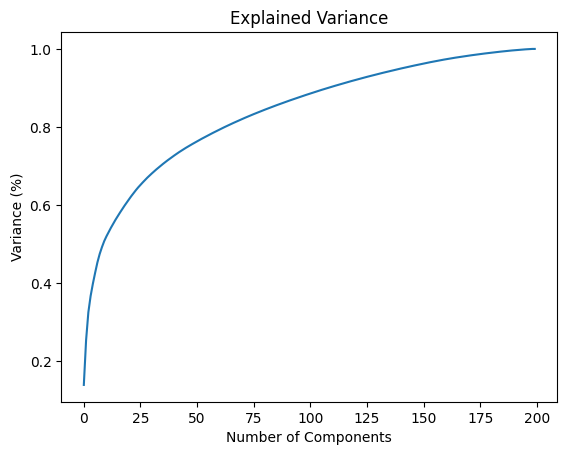

In [193]:
# Fit PCA on your preprocessed data
pca = PCA().fit(X_train_preprocessed)

# Plot the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/var/folders/38/8tgmhx7s5t3_6pmj8rgrysmm0000gn/T/ipykernel_58985/2238343830.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='UMAP 1', ylabel='UMAP 2'>

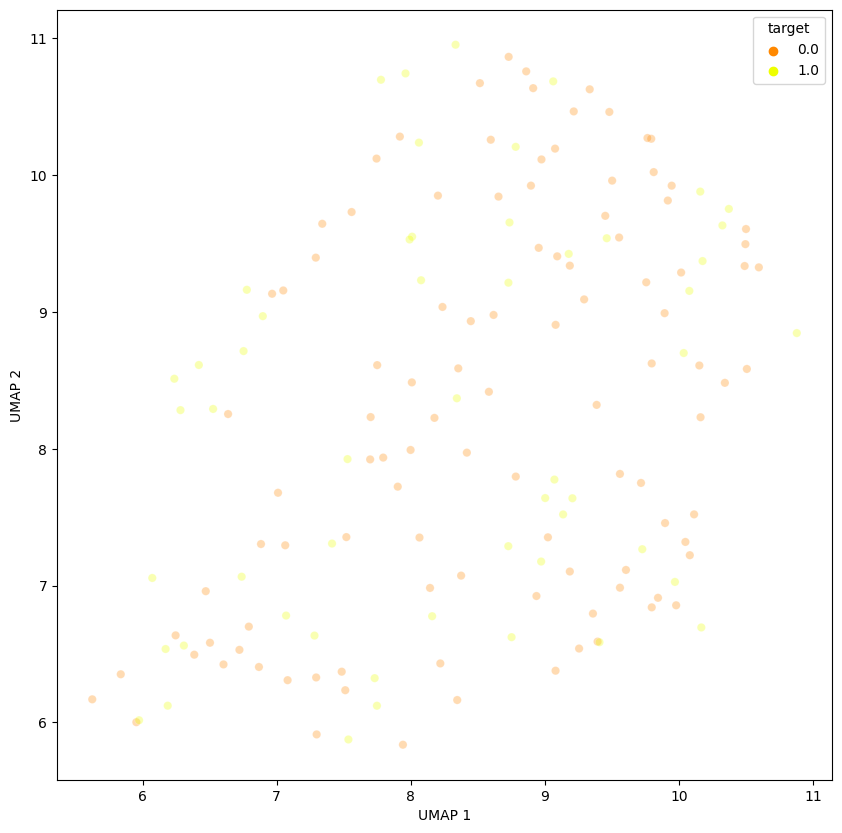

In [194]:
# Fit UMAP on your preprocessed data
umap = UMAP(n_components=2).fit_transform(preprocessor.transform(X_train))

# Create a DataFrame for visualization
umap_df = pd.DataFrame(data = umap, columns = ['UMAP 1', 'UMAP 2'])

# Add target variable for coloring
umap_df['target'] = y_train

# Scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="UMAP 1", y="UMAP 2",
    hue="target",
    palette=sns.color_palette("hsv", 10),
    data=umap_df,
    legend="full",
    alpha=0.3
)

# Now to Modeling!

In [195]:
# Define the model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)


# Create and evaluate the pipeline
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model1)
                       ])

# Fit and predict
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 90.00%


In [196]:

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.92        27
         1.0       1.00      0.78      0.88        23

    accuracy                           0.90        50
   macro avg       0.92      0.89      0.90        50
weighted avg       0.92      0.90      0.90        50

[[27  0]
 [ 5 18]]


In [197]:
model2 = LogisticRegression(max_iter=1000)
umap = UMAP(n_components=25) # Again, choose n_components based on your requirements.

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('umap', umap),
                        ('model', model2)
                       ])

In [198]:
model2 = LogisticRegression(max_iter=1000)
pca = PCA(n_components=20)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', model2)
                       ])


In [227]:
model2 = LogisticRegression(max_iter=1000)

pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model2)
                       ])


In [228]:
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [229]:

print(classification_report(y_test, y_pred2))

print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        27
         1.0       0.81      0.74      0.77        23

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50

[[23  4]
 [ 6 17]]


In [204]:
model3 = xgb.XGBClassifier()

pipe3 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', model3)
                       ])


In [205]:

pipe3.fit(X_train, y_train)
y_pred3 = pipe3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.00%


In [206]:

print(classification_report(y_test, y_pred3))

print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        27
         1.0       0.87      0.87      0.87        23

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50

[[24  3]
 [ 3 20]]


In [207]:
from keras import regularizers
from scikeras.wrappers import KerasClassifier

In [230]:
X.shape

(250, 22738)

In [231]:
X['tissue'].value_counts()

superior temporal gyrus    64
parahippocampal gyrus      63
inferior frontal gyrus     61
frontal pole               60
prefrontal cortex           2
Name: tissue, dtype: int64

In [219]:
def create_model():
    model4 = models.Sequential()
    model4.add(layers.Dense(512, activation='relu', input_shape=(22741,)))
    model4.add(layers.Dense(256, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(128, activation='relu'))
    model4.add(BatchNormalization())
    model4.add(Dropout(0.5))
    model4.add(layers.Dense(1, activation='sigmoid'))

    model4.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
    return model4


In [220]:
model5 = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=2)

In [221]:

pipe5 = Pipeline(steps=[('preprocessor', preprocessor),
            
                        ('model', model5)
                       ])


In [222]:
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Epoch 1/50


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
2023-08-01 13:13:14.487599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 - 1s - loss: 0.8656 - acc: 0.6100 - 1s/epoch - 63ms/step
Epoch 2/50
20/20 - 0s - loss: 0.6215 - acc: 0.7350 - 183ms/epoch - 9ms/step
Epoch 3/50
20/20 - 0s - loss: 0.5222 - acc: 0.7950 - 203ms/epoch - 10ms/step
Epoch 4/50
20/20 - 0s - loss: 0.3847 - acc: 0.8200 - 198ms/epoch - 10ms/step
Epoch 5/50
20/20 - 0s - loss: 0.3738 - acc: 0.8300 - 242ms/epoch - 12ms/step
Epoch 6/50
20/20 - 0s - loss: 0.2331 - acc: 0.9000 - 200ms/epoch - 10ms/step
Epoch 7/50
20/20 - 0s - loss: 0.2178 - acc: 0.9300 - 200ms/epoch - 10ms/step
Epoch 8/50
20/20 - 0s - loss: 0.2235 - acc: 0.9250 - 205ms/epoch - 10ms/step
Epoch 9/50
20/20 - 0s - loss: 0.1834 - acc: 0.9450 - 197ms/epoch - 10ms/step
Epoch 10/50
20/20 - 0s - loss: 0.1768 - acc: 0.9250 - 196ms/epoch - 10ms/step
Epoch 11/50
20/20 - 0s - loss: 0.1603 - acc: 0.9500 - 195ms/epoch - 10ms/step
Epoch 12/50
20/20 - 0s - loss: 0.1451 - acc: 0.9350 - 194ms/epoch - 10ms/step
Epoch 13/50
20/20 - 0s - loss: 0.1556 - acc: 0.9450 - 187ms/epoch - 9ms/step
Epoch 14/50

2023-08-01 13:13:25.537518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [232]:
y_pred_proba = pipe5.predict(X_test)
y_pred5 = np.where(y_pred_proba > 0.5, 1, 0)

accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


5/5 - 0s - 78ms/epoch - 16ms/step
Accuracy: 80.00%


In [233]:

print(classification_report(y_test, y_pred5))

print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        27
         1.0       0.78      0.78      0.78        23

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50

[[22  5]
 [ 5 18]]


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the parameter grid for logistic regression with penalty
param_grid_with_penalty = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Define the parameter grid for logistic regression without penalty
param_grid_without_penalty = {
    'model__penalty': [None],
    'model__solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a base model
logreg = LogisticRegression(max_iter=10000)

pca = PCA(n_components=20)

# Create pipeline
pipe6 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', logreg)
                       ])

# Instantiate the grid search model
grid_search_with_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_with_penalty, cv=5, n_jobs=-1, verbose=2)
grid_search_without_penalty = GridSearchCV(estimator=pipe6, param_grid=param_grid_without_penalty, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search_with_penalty.fit(X_train, y_train)
grid_search_without_penalty.fit(X_train, y_train)

# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)


Fitting 5 folds for each of 105 candidates, totalling 525 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
280 fits failed out of a total of 525.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/tooters/

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters with penalty: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'lbfgs'}
Best score with penalty: 0.7127272727272727
Best score without penalty: 0.7109090909090909


In [137]:
# Check the best parameters found by GridSearchCV
print("Best parameters with penalty:", grid_search_with_penalty.best_params_)
print("Best parameters without penalty:", grid_search_without_penalty.best_params_)

# Check the best scores found by GridSearchCV
print("Best score with penalty:", grid_search_with_penalty.best_score_)
print("Best score without penalty:", grid_search_without_penalty.best_score_)

Best parameters with penalty: {'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
Best parameters without penalty: {'model__penalty': None, 'model__solver': 'lbfgs'}
Best score with penalty: 0.7127272727272727
Best score without penalty: 0.7109090909090909


In [234]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__max_features': ['sqrt', 'log2', 0.5],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 5]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Create pipeline
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', rf)
                       ])

# Instantiate the randomized search model
random_search = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=1000, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/homebrew/Caskroom/miniforge/base/envs/tooters/lib/python3.8/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 324 is smaller than n_iter=1000. Running 324 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [132]:
# Get the best parameters from the grid search
best_params = grid_search_with_penalty.best_params_

# Adjust the parameters by removing 'model__'
best_params_adjusted = {k.replace('model__', ''): v for k, v in best_params.items()}

# Fit a new model using the best parameters from the grid search
best_model = LogisticRegression()

pca = PCA(n_components=20)

# Create and evaluate the pipeline
pipe7 = Pipeline(steps=[('preprocessor', preprocessor),
                        ('pca', pca),
                        ('model', best_model)
                       ])

# Fit and predict
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred7)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred7))

print(confusion_matrix(y_test, y_pred7))


Accuracy: 74.64%
              precision    recall  f1-score   support

         0.0       0.82      0.68      0.74        75
         1.0       0.68      0.83      0.75        63

    accuracy                           0.75       138
   macro avg       0.75      0.75      0.75       138
weighted avg       0.76      0.75      0.75       138

[[51 24]
 [11 52]]


In [254]:
# Get the one-hot encoder from the preprocessor
onehot = pipe2.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Get the coefficients from the model
coefficients = pipe2.named_steps['model'].coef_[0]

# Create a pandas Series for easy manipulation
coef_series = pd.Series(coefficients, index=feature_names)

# Get the absolute values to consider the magnitude of the coefficients
abs_coefs = coef_series.abs()

# Sort the features by the absolute values of their coefficients in descending order
sorted_features = abs_coefs.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000187260    0.024129
ENSG00000287756    0.022207
ENSG00000265813    0.022152
ENSG00000178031    0.021650
ENSG00000274602    0.021026
ENSG00000007908    0.020723
ENSG00000232104    0.020671
ENSG00000144230    0.020526
ENSG00000128422    0.020282
ENSG00000265194    0.020222
ENSG00000162482    0.020108
ENSG00000244734    0.020081
ENSG00000171502    0.020043
ENSG00000265735    0.020030
ENSG00000100983    0.019826
ENSG00000111863    0.019795
ENSG00000231952    0.019771
ENSG00000250790    0.019759
ENSG00000139289    0.019758
ENSG00000230965    0.019675
ENSG00000267419    0.019576
ENSG00000259291    0.019457
ENSG00000146416    0.019429
ENSG00000172771    0.019405
ENSG00000114745    0.019380
ENSG00000274471    0.019255
ENSG00000154529    0.019024
ENSG00000111962    0.018924
ENSG00000100147    0.018777
ENSG00000225978    0.018777
ENSG00000079689    0.018695
ENSG00000198743    0.018647
ENSG00000254838    0.018633
ENSG00000181938    0.018242
ENSG00000152208    0.018154
ENSG00000165092    0

In [260]:
# Get the model from the pipeline
model2 = pipe1.named_steps['model']

# Get feature importance
feature_importance = model2.feature_importances_

# Get the one-hot encoder from the preprocessor
onehot = pipe2.named_steps['preprocessor'].named_transformers_['cat']

# Get the feature names after one-hot encoding
onehot_features = onehot.get_feature_names_out(categorical_cols)

# This will give you a list of original features
original_features = numerical_cols

# Combine original and one-hot encoded feature names
feature_names = np.concatenate([original_features, onehot_features])

# Create a pandas Series for easy manipulation
feature_importance_series = pd.Series(feature_importance, index=feature_names)

# Sort the features by their feature importance in descending order
sorted_features = feature_importance_series.sort_values(ascending=False)

# Print the top n features
n = 50  # change this to the number of top features you want to print
print(sorted_features[:n])


ENSG00000070495    0.013545
ENSG00000059588    0.009409
ENSG00000120875    0.008573
ENSG00000120071    0.008249
ENSG00000134769    0.008066
ENSG00000154874    0.007550
ENSG00000224389    0.007548
ENSG00000057252    0.007511
ENSG00000151702    0.007264
ENSG00000146416    0.007060
ENSG00000178104    0.006448
ENSG00000204252    0.006239
ENSG00000164600    0.005760
ENSG00000111863    0.005433
ENSG00000163046    0.005365
ENSG00000204929    0.005336
ENSG00000158560    0.005159
ENSG00000111961    0.004952
ENSG00000115107    0.004780
ENSG00000163879    0.004706
ENSG00000187094    0.004581
ENSG00000012223    0.004573
ENSG00000273319    0.004483
ENSG00000196972    0.004477
ENSG00000090857    0.004464
ENSG00000244731    0.004444
ENSG00000145882    0.004356
ENSG00000185591    0.004306
ENSG00000102317    0.004224
ENSG00000185008    0.004183
ENSG00000188039    0.004151
ENSG00000157680    0.004151
ENSG00000100227    0.004131
ENSG00000197471    0.004091
ENSG00000108932    0.004047
ENSG00000182253    0

In [261]:
ETG = pd.read_csv('data/RNAseqHarm/MSBB_Differential_Expression_(diagnosis-sex-age-death).tsv', delimiter="\t")

In [262]:
ETG.columns

Index(['Comparison', 'ensembl_gene_id', 'logFC', 'CI.L', 'CI.R', 'AveExpr',
       't', 'P.Value', 'adj.P.Val', 'Direction', 'hgnc_symbol',
       'percentage_gene_gc_content', 'gene_biotype', 'chromosome_name',
       'gene_length'],
      dtype='object')

In [263]:
ETG = ETG[['ensembl_gene_id','hgnc_symbol']]

In [264]:
ETG.head()

,ensembl_gene_id,hgnc_symbol
0,ENSG00000114374,USP9Y
1,ENSG00000129824,RPS4Y1
2,ENSG00000067048,DDX3Y
3,ENSG00000183878,UTY
4,ENSG00000263934,SNORD3A


In [265]:
ETG = ETG.drop_duplicates(subset='hgnc_symbol')

In [266]:
print(sorted_features.head())
print(sorted_features.tail())

ENSG00000070495    0.013545
ENSG00000059588    0.009409
ENSG00000120875    0.008573
ENSG00000120071    0.008249
ENSG00000134769    0.008066
dtype: float64
ENSG00000147862                   0.0
ENSG00000147854                   0.0
ENSG00000147853                   0.0
ENSG00000147852                   0.0
tissue_superior temporal gyrus    0.0
dtype: float64


In [267]:
# Reset the index of sorted_features
sorted_features = sorted_features.reset_index()

In [268]:
# Rename the columns of sorted_features for the merge operation
sorted_features.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df = pd.merge(sorted_features, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df.set_index('hgnc_symbol', inplace=True)

# Select the top n features
top_features = merged_df['coef'].head(50)


In [269]:
print(ETG['ensembl_gene_id'].nunique())
print(ETG.shape[0])


22706
22706


In [270]:
X.shape

(250, 22738)

In [271]:
top_features

hgnc_symbol
JMJD6         0.013545
TARBP1        0.009409
DUSP4         0.008573
KANSL1        0.008249
DTNA          0.008066
CCDC144B      0.007550
C4B           0.007548
SOAT1         0.007511
FLI1          0.007264
AIG1          0.007060
PDE4DIP       0.006448
HLA-DOA       0.006239
NEUROD6       0.005760
ADTRP         0.005433
ANKRD30BL     0.005365
AC007389.1    0.005336
DYNC1I1       0.005159
SASH1         0.004952
STEAP3        0.004780
DNALI1        0.004706
CCK           0.004581
LTF           0.004573
AC058791.1    0.004483
SMIM10L2B     0.004477
PDPR          0.004464
C4A           0.004444
PCYOX1L       0.004356
SP1           0.004306
RBM3          0.004224
ROBO2         0.004183
NWD1          0.004151
DGKI          0.004151
POLDIP3       0.004131
SPN           0.004091
SLC16A6       0.004047
SYNM          0.004037
VSIG4         0.003986
REL           0.003972
NRXN3         0.003945
COLEC12       0.003933
IARS          0.003874
BEX3          0.003849
ST6GAL2       0.003833

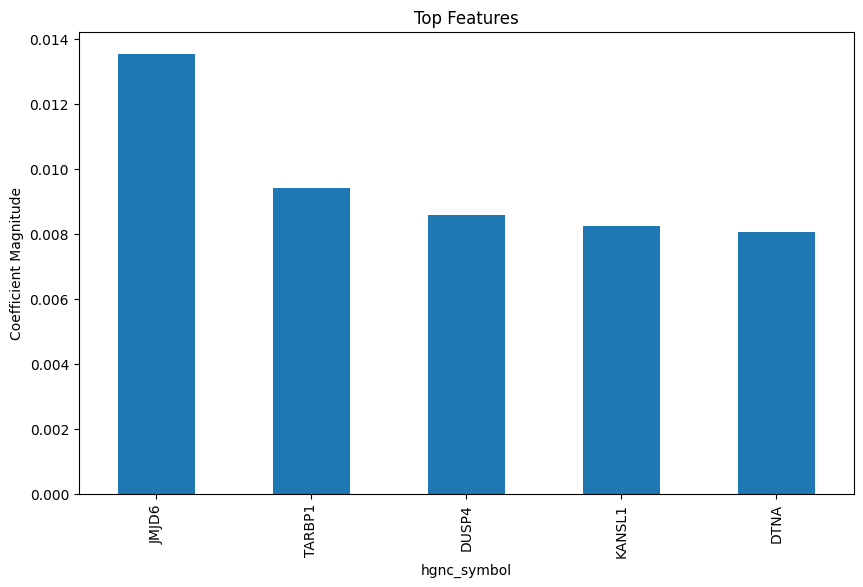

In [247]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))  # adjust the size of the figure as needed
top_features.plot(kind='bar')
plt.title('Top Features')
plt.ylabel('Coefficient Magnitude')
plt.show()


In [357]:
# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list
top_features1 = top_features

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features1[gene] = coef  # add the gene and its coefficient to the top_features


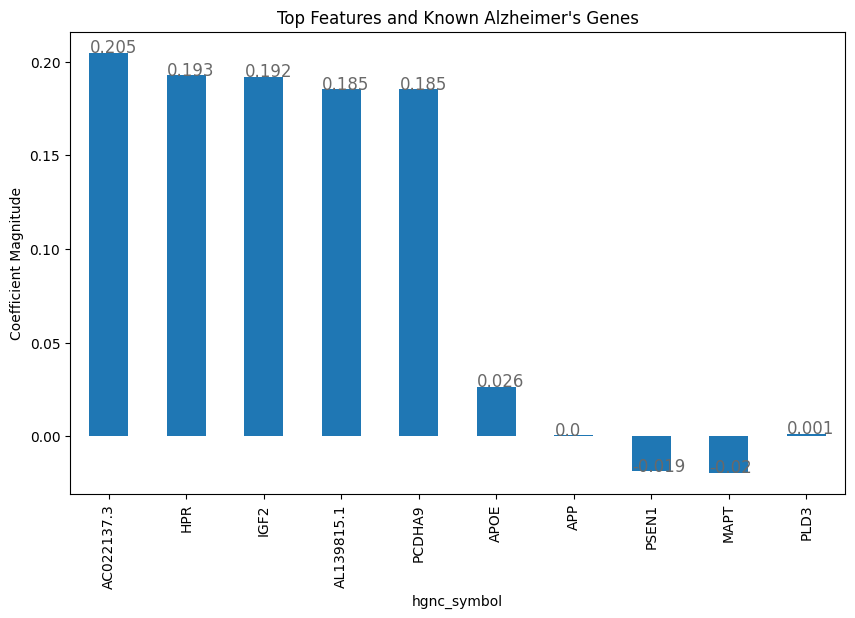

In [359]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))  # adjust the size of the figure as needed
top1_features.plot(kind='bar', ax=ax)
plt.title('Top Features and Known Alzheimer\'s Genes')
plt.ylabel('Coefficient Magnitude')

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    
plt.show()


In [382]:
sorted_features1_df = sorted_features1.reset_index()

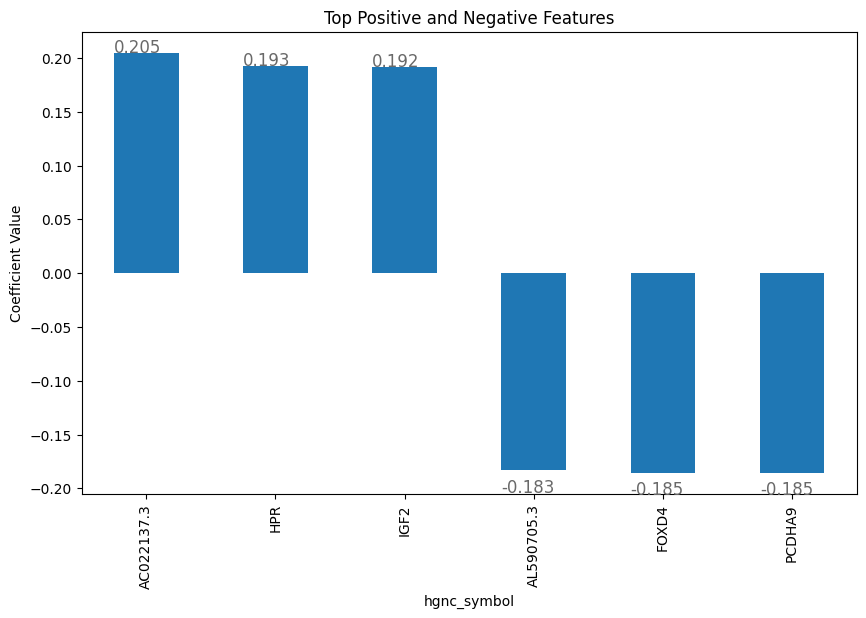

In [390]:
# Convert Series to DataFrame
coef_series_sorted_df = coef_series_sorted.reset_index()

# Rename the columns of sorted_features_df for the merge operation
coef_series_sorted_df.columns = ['ensembl_gene_id', 'coef']

# Merge with the df_hgnc to get the corresponding hgnc_symbol
merged_df1 = pd.merge(coef_series_sorted_df, ETG, on='ensembl_gene_id', how='left')

# Set 'hgnc_symbol' as index
merged_df1.set_index('hgnc_symbol', inplace=True)

# Get the top n positive features and top n negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 6))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive and Negative Features')
plt.ylabel('Coefficient Value')
plt.show()


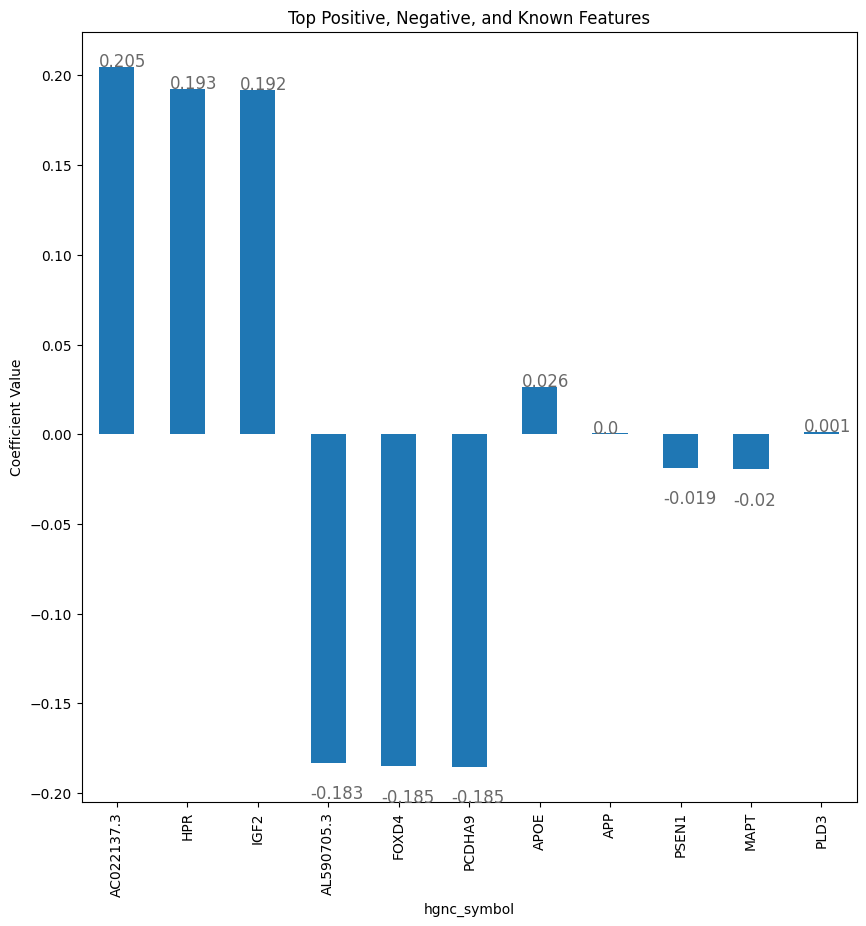

In [396]:
# Get the top 2 positive features and top 2 negative features
top_positive_features = merged_df1['coef'].head(3)
top_negative_features = merged_df1['coef'].tail(3)

# Concatenate these series together
top_features2 = pd.concat([top_positive_features, top_negative_features])

# Known gene
baseline_genes = ['APOE','APP', 'PSEN1', 'MAPT', 'PLD3']  # add more known genes to this list

# Add coefficients of known genes to the top_features
for gene in baseline_genes:
    ensembl_id = ETG[ETG['hgnc_symbol'] == gene]['ensembl_gene_id'].values[0]  # get the Ensembl ID of the gene
    coef = coef_series[ensembl_id]  # get the coefficient of the gene
    top_features2[gene] = coef  # add the gene and its coefficient to the top_features2

# Plot the bar graph
ax = top_features2.plot(kind='bar', figsize=(10, 10))

# Add the values on top of each bar
for i in ax.patches:
    # Place the label at the top of the bar for positive coefficients, bottom for negative
    if i.get_height() > 0:
        ax.text(i.get_x(), i.get_height(), round(i.get_height(), 3), fontsize=12, color='dimgrey')
    else:
        ax.text(i.get_x(), i.get_height()-0.02, round(i.get_height(), 3), fontsize=12, color='dimgrey')

plt.title('Top Positive, Negative, and Known Features')
plt.ylabel('Coefficient Value')
plt.show()


In [374]:
ls1 = df.columns.tolist()

In [376]:
print(ls1)

['feature', '510_120515', '207_120424', '81_120417', '649_120529', '487_120515', '182_120424', '193_120424', '694_120605', '366_120502', '52_120416', '522_120515', '493_120515', '602_120523', '634_120524', '653_120529', '391_120503', '453_120507', '371_120502', '414_120503', '102_120418', '641_120524', '111_120418', '600_120523', '188_120424', '321_120501', '547_120516', '130_120419', '305_120430', '668_120530', '555_120517', '679_120604', '318_120501', '112_120418', '689_120604', '418_120507', '589_120522', '216_120425', '654_120529', '619_120524', '358_120502', '312_120430', '624_120524', '576_120521', '410_120503', '274_120430', '408_120503', '76_120417', '340_120501', '288_120430', '222_120425', '234_120425', '578_120521', '46_120416', '477_120514', '683_120604', '39_120416', '309_120430', '121_120418', '405_120503', '482_120514', '607_120523', '565_120517', '120_120418', '507_120515', '260_120426', '273_120430', '524_120515', '556_120517', '113_120418', '160_120423', '698_120605',